## Women's Rights
### World Bank Group - Women, Business and the Law Historical Data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

This is a time series dataset.

In [2]:
world_bank_df = pd.read_csv('../datasets/processed/women/world-bank/women-business-and-the-law-historical.csv', header=0)
print(f"Records: {len(world_bank_df)}")

world_bank_df.info()


Records: 10260
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              10260 non-null  object 
 1   ISO Code                             10260 non-null  object 
 2   year                                 10260 non-null  int64  
 3   wbl_index                            10260 non-null  float64
 4   mobility                             10260 non-null  int64  
 5   woman_choose_residence               10260 non-null  bool   
 6   woman_travel_outside_home            10260 non-null  bool   
 7   woman_apply_passport                 10260 non-null  bool   
 8   woman_travel_abroad                  10260 non-null  bool   
 9   workplace                            10260 non-null  int64  
 10  woman_get_job                        10260 non-null  bool   
 11  law_prohibits

We know that "wbl_index" correlation with "mobility", "workplace", "pay", etcetera is fixed, because it's an average.

I will still run a PCA over those predictors to see how representative each one is in the dataset.

Text(0, 0.5, 'PC2')

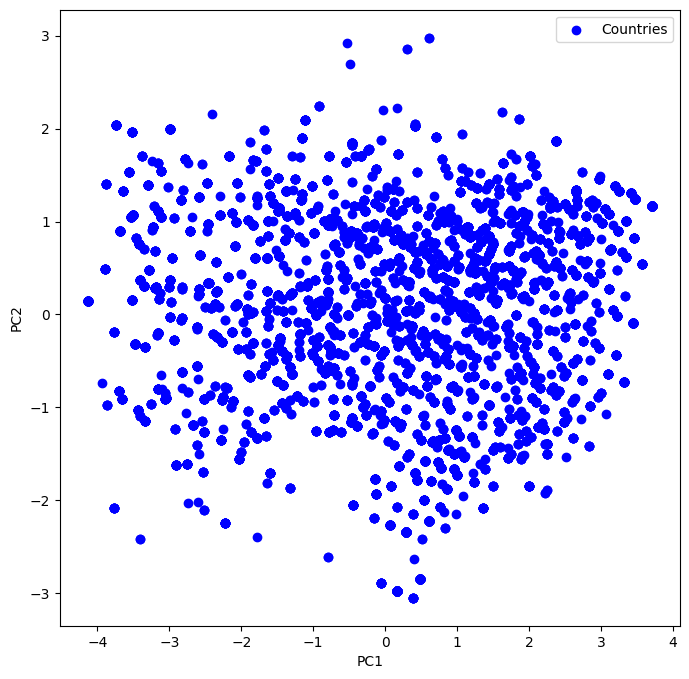

In [3]:
predictors = ['mobility', 'workplace', 'pay', 'marriage', 'parenthood', 'entrepreneurship', 'assets', 'pension']
world_bank_df_components = world_bank_df[predictors]

scaler = StandardScaler()
world_bank_df_scaled = scaler.fit_transform(world_bank_df_components)
world_bank_df_scaled = pd.DataFrame(
    world_bank_df_scaled,
    index=world_bank_df_components.index,
    columns=world_bank_df_components.columns
)
world_bank_df_scaled.describe()

pca = PCA()
pca.fit(world_bank_df_scaled)
scores = pca.transform(world_bank_df_scaled)
scores.shape

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1], color='blue', label='Countries')
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Plotting the PCA with only two components demonstrated high variance.

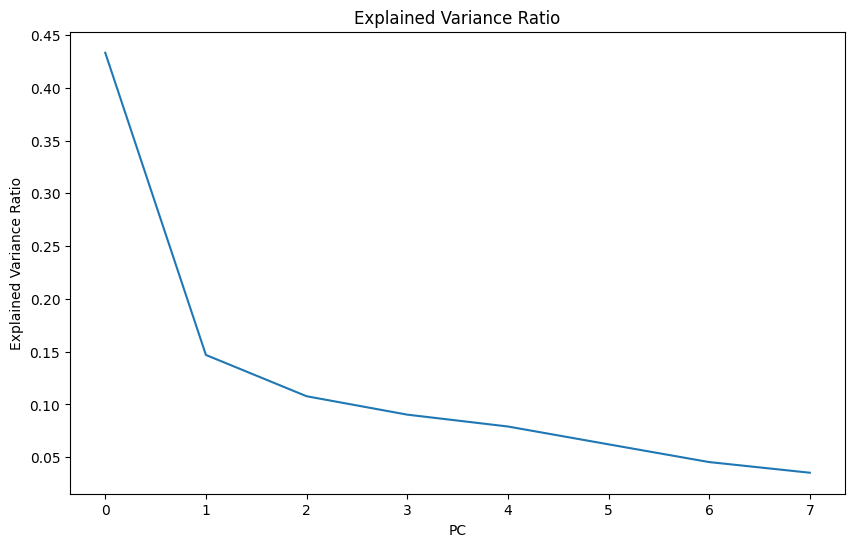

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')
plt.show()

The first principal component explains 40% of the variance. The second one 15%. I'll analyze the loadings of the first principal component to understand which predictors are more important to understand the difference between the countries.

In [5]:
# Print the loadings of the first principal component associated with the predictors
loadings = pd.DataFrame(
    {'Predictor': predictors,
     'Loading': pca.components_[0]
    }
).sort_values(by='Loading', ascending=False)

print("First Principal Component Loadings:")
print(loadings)

loadings = pd.DataFrame(
    {'Predictor': predictors,
     'Loading': pca.components_[1]
    }
).sort_values(by='Loading', ascending=False)

print("\nSecond Principal Component Loadings:")
print(loadings)

First Principal Component Loadings:
          Predictor   Loading
1         workplace  0.431281
3          marriage  0.430444
6            assets  0.400386
0          mobility  0.373072
4        parenthood  0.346378
5  entrepreneurship  0.306734
2               pay  0.305258
7           pension  0.148248

Second Principal Component Loadings:
          Predictor   Loading
7           pension  0.731205
2               pay  0.431628
1         workplace  0.163359
5  entrepreneurship  0.141179
4        parenthood -0.118383
3          marriage -0.200463
6            assets -0.247019
0          mobility -0.342346


All the scores are somewhat significant. Pension is the least important for PC1 but it's the most important by far on PC2.

In [6]:
world_bank_df['year'].value_counts().sort_values(ascending=False)

year
1971    190
1972    190
1973    190
1974    190
1975    190
1976    190
1977    190
1978    190
1979    190
1980    190
1981    190
1982    190
1983    190
1984    190
1985    190
1986    190
1987    190
1988    190
1989    190
1990    190
1991    190
1992    190
1993    190
1994    190
1995    190
1996    190
1997    190
1998    190
1999    190
2000    190
2001    190
2002    190
2003    190
2004    190
2005    190
2006    190
2007    190
2008    190
2009    190
2010    190
2011    190
2012    190
2013    190
2014    190
2015    190
2016    190
2017    190
2018    190
2019    190
2020    190
2021    190
2022    190
2023    190
2024    190
Name: count, dtype: int64

I'll select the year 2018 as the latest and more complete snapshot of the dataset and calculate the PCA for this year.

Text(0, 0.5, 'PC2')

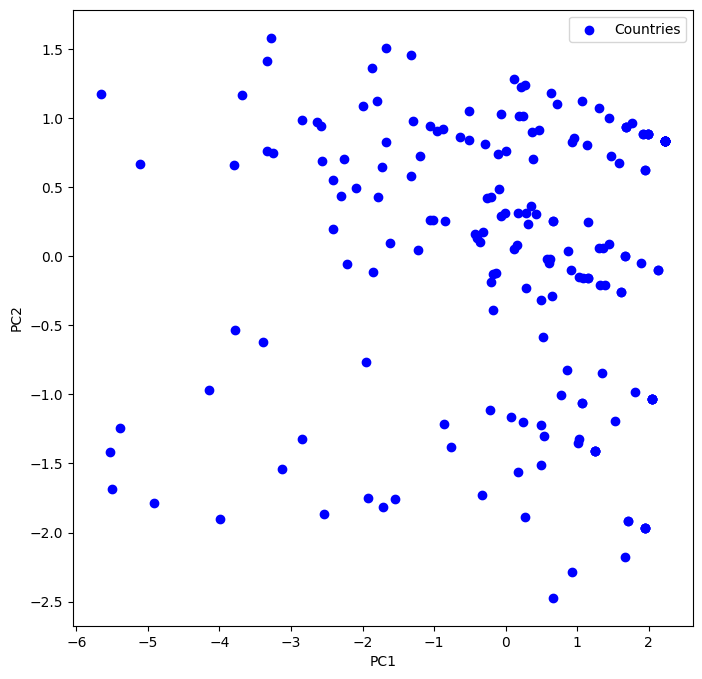

In [7]:
world_bank_df_snapshot = world_bank_df[world_bank_df['year'] == 2024]
world_bank_df_snapshot.head()
world_bank_df_components = world_bank_df_snapshot[predictors]
scaler = StandardScaler()
world_bank_df_scaled = scaler.fit_transform(world_bank_df_components)
world_bank_df_scaled = pd.DataFrame(
    world_bank_df_scaled,
    index=world_bank_df_components.index,
    columns=world_bank_df_components.columns
)
world_bank_df_scaled.describe()

pca = PCA()
pca.fit(world_bank_df_scaled)
scores = pca.transform(world_bank_df_scaled)
scores.shape

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1], color='blue', label='Countries')
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

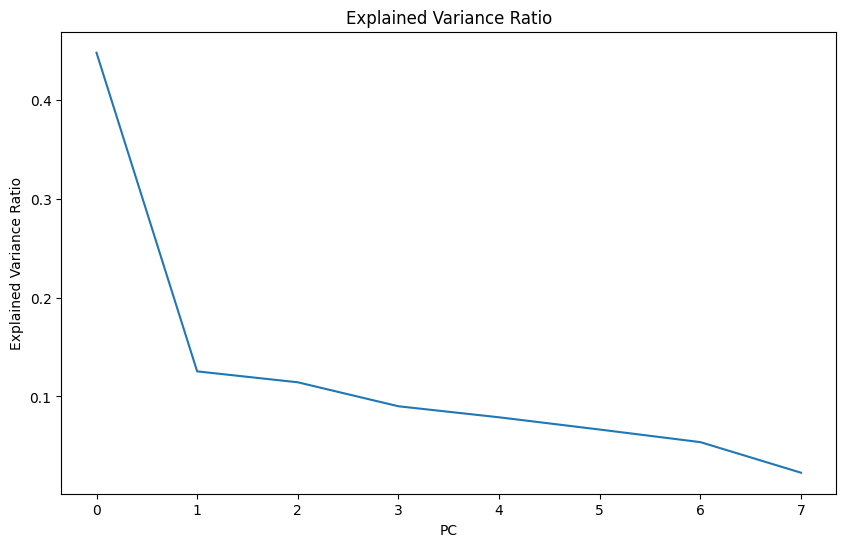

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [11]:
loadings = pd.DataFrame(
    {'Predictor': predictors,
     'Loading': pca.components_[0]
    }
).sort_values(by='Loading', ascending=False)

print("First Principal Component Loadings:")
print(loadings)

loadings = pd.DataFrame(
    {'Predictor': predictors,
     'Loading': pca.components_[1]
    }
).sort_values(by='Loading', ascending=False)

print("\nSecond Principal Component Loadings:")
print(loadings)

First Principal Component Loadings:
          Predictor   Loading
3          marriage  0.417528
6            assets  0.415031
0          mobility  0.406439
1         workplace  0.389543
4        parenthood  0.367882
2               pay  0.317715
5  entrepreneurship  0.302800
7           pension  0.092274

Second Principal Component Loadings:
          Predictor   Loading
7           pension  0.953425
2               pay  0.241624
0          mobility -0.050629
1         workplace -0.059253
3          marriage -0.071790
6            assets -0.081648
4        parenthood -0.082091
5  entrepreneurship -0.089245


If we look at the current situation in the countries, the freedom to get married, divorced, and intra-marriage violence is the most important indicator, as well as pension.

I'll take a snapshot of the last year and create a new dataset.

In [10]:
world_bank_df_snapshot.drop(columns=['year'], inplace=True)
world_bank_df_snapshot.to_csv('../datasets/processed/women/world-bank/women-business-and-the-law-snapshot.csv', index=False)

/var/folders/3c/bf3091xd4h9fj5rvqhp6_05r0000gq/T/ipykernel_86192/1903653018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_bank_df_snapshot.drop(columns=['year'], inplace=True)
